# Fist lab of the _"Investment Management with Python and Machine Learning Specialization"_.

First of all, return on two different prices is defined by: <br>
$$R=\frac{P_{t+1}}{P_t} -1$$

In [1]:
import numpy as np
import pandas as pd

*Given the following list of prices, evaluate the return:*

In [2]:
prices_a = [8.70, 8.90, 8.71]
8.90/8.70-1

0.02298850574712663

In [3]:
8.71/8.90-1

-0.02134831460674147

Given the fact that I have a list of prices, let's compute a list of returns.

In [4]:
prices_a[1:]

[8.9, 8.71]

In [5]:
prices_a[:-1]

[8.7, 8.9]

**Note that these are lists and not arrays**. In order to divide them you should first transform them into arrays.

**1) NUMPY ARRAYS** <p>
Transforming prices_a into a np.array in order to compute the return by applying the definition

In [6]:
prices_a = np.array(prices_a)
prices_a[1:]/prices_a[:-1] -1

array([ 0.02298851, -0.02134831])

**2) PANDAS DATAFRAME**

In [7]:
prices = pd.DataFrame({"BLUE" : [8.70, 8.90, 8.71, 8.43, 8.73],
                       "ORANGE" : [10.66, 11.08, 10.71, 11.59, 12.11]})
prices

,BLUE,ORANGE
0,8.70,10.66
1,8.90,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


Slicing in pandas dataframe is made through pd.iloc.
Let's show every value except the first ones (the ones at index 0):

In [8]:
prices.iloc[1:]

,BLUE,ORANGE
1,8.90,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


Let's now show every value except the last ones:

In [9]:
prices.iloc[:-1]

,BLUE,ORANGE
0,8.70,10.66
1,8.90,11.08
2,8.71,10.71
3,8.43,11.59


*Let's now calculate the returns*

In [10]:
prices.iloc[1:]/prices.iloc[:-1] -1

,BLUE,ORANGE
0,NaN,NaN
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,NaN,NaN


**This doesn't work! The problem is related to the allignment of indexes**
In order to solve the issue, you should use the .values function which sort of extracts values in the dataframe with no indexes as numpy arrays in a sense.

In [11]:
prices.iloc[1:].values/prices.iloc[:-1]-1

,BLUE,ORANGE
0,0.022989,0.039400
1,-0.021348,-0.033394
2,-0.032147,0.082166
3,0.035587,0.044866


In [12]:
prices.iloc[1:]/prices.iloc[:-1].values-1

,BLUE,ORANGE
1,0.022989,0.039400
2,-0.021348,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


**3)SHIFT()**

In [13]:
prices

,BLUE,ORANGE
0,8.70,10.66
1,8.90,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [14]:
prices.shift(1)

,BLUE,ORANGE
0,NaN,NaN
1,8.70,10.66
2,8.90,11.08
3,8.71,10.71
4,8.43,11.59


*As you can see, .shift(1) simply shifts the values down by one index*

Returns are very very easy to calculate through this function:

In [15]:
prices/prices.shift(1) -1 

,BLUE,ORANGE
0,NaN,NaN
1,0.022989,0.039400
2,-0.021348,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


**4) PCT_CHANGE()**

In [16]:
returns = prices.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.022989,0.039400
2,-0.021348,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


**Below you can find some useful statistical tools.**

<AxesSubplot:>

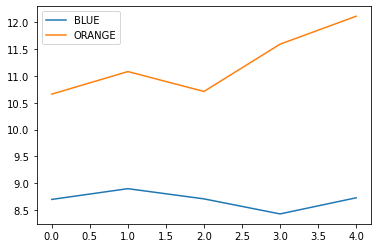

In [17]:
prices.plot()

<AxesSubplot:>

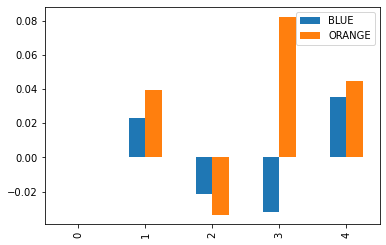

In [18]:
returns.plot.bar()

In [19]:
returns.mean()

BLUE      0.00127
ORANGE    0.03326
dtype: float64

In [20]:
returns.std()

BLUE      0.033054
ORANGE    0.048328
dtype: float64

**COMPOUND RETURN COMPUTATION**

First of all, compound return is defined by:
$$R=\prod_i (1+R_i) -1 $$

**1) NP.PROD()**

In [21]:
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.022989,0.039400
2,-0.021348,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


In [22]:
returns+1

,BLUE,ORANGE
0,NaN,NaN
1,1.022989,1.039400
2,0.978652,0.966606
3,0.967853,1.082166
4,1.035587,1.044866


In [23]:
np.prod(returns+1)

BLUE      1.003448
ORANGE    1.136023
dtype: float64

In [24]:
np.prod(returns+1)-1

BLUE      0.003448
ORANGE    0.136023
dtype: float64

Steps are very easy to follow, as you can see from the previous output the *orange* stock has a *better return*. 

**2) DF.PROD()**

In [25]:
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.022989,0.039400
2,-0.021348,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


In [28]:
(returns+1).prod() -1

BLUE      0.003448
ORANGE    0.136023
dtype: float64

**PERIODIC RETURN**

Given a fixed return *rm* over a *N*-months period of time, the return is defined by: 
$$ R=(1+rm)^N -1 $$

In [31]:
rm=0.01
R = (1+rm)**12-1
R

0.12682503013196977